In [32]:
# First, let's read the uploaded CSV file to understand its structure and the data it contains.
import pandas as pd

# Load the CSV file
file_path = '/Users/michael/Desktop/SpringData2024-main/data/index/state_renewability_index_and_rankings_2018_2021.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,State,Renewability Index_2018,Rank_2018,Renewability Index_2019,Rank_2019,Renewability Index_2020,Rank_2020,Renewability Index_2021,Rank_2021
0,WA,82.057418,1.0,75.425931,4.0,83.555851,1.0,75.912669,2.0
1,OR,80.912768,2.0,76.262460,3.0,80.349674,2.0,72.662182,3.0
2,ME,76.042543,3.0,82.047258,1.0,75.781681,4.0,66.321009,5.0
3,VT,73.135827,4.0,75.063637,5.0,72.649749,5.0,70.085190,4.0
4,SD,72.693354,5.0,78.195245,2.0,78.735551,3.0,81.778015,1.0


/var/folders/sr/8t8bp4bs34q2tsvdh72v68_80000gn/T/ipykernel_19300/2633212051.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


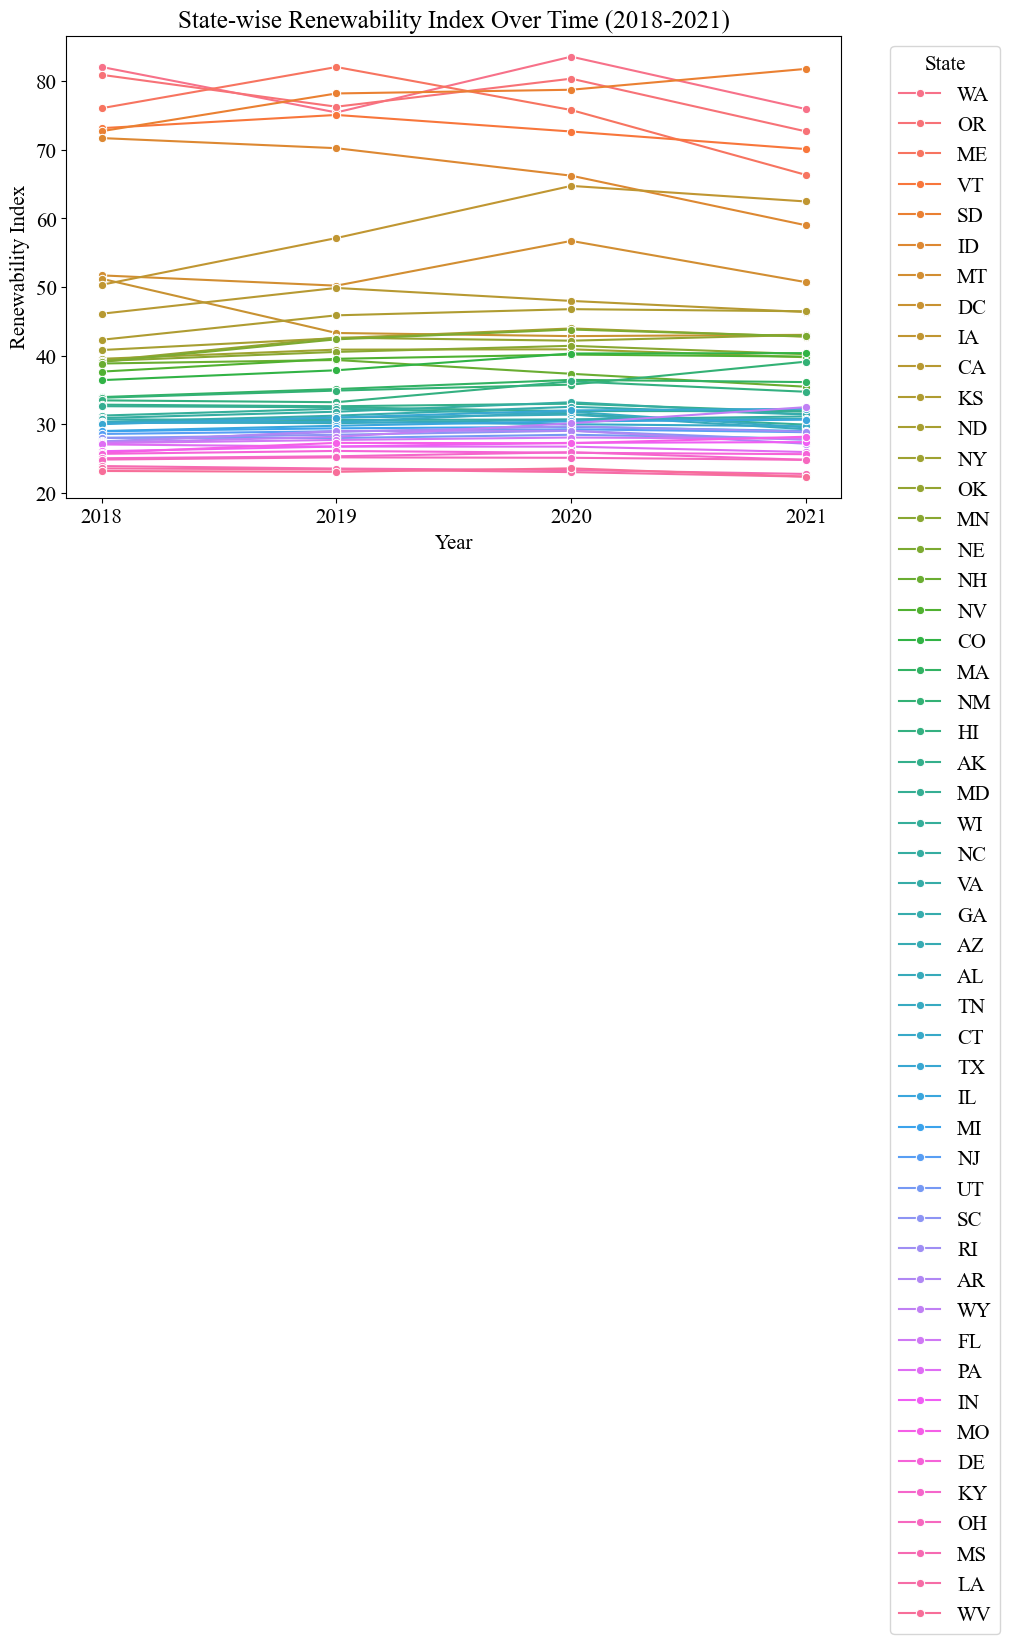

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the dataframe to have one row per state-year combination
# Keeping only the Renewability Index values and the year
melted_data = data.melt(id_vars=["State"], 
                        value_vars=["Renewability Index_2018", "Renewability Index_2019", 
                                    "Renewability Index_2020", "Renewability Index_2021"],
                        var_name="Year", value_name="Renewability Index")

# Extract year from the 'Year' column and convert it to integer
melted_data["Year"] = melted_data["Year"].apply(lambda x: int(x.split("_")[-1]))

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_data, x="Year", y="Renewability Index", hue="State", marker="o")
plt.title("State-wise Renewability Index Over Time (2018-2021)")
plt.ylabel("Renewability Index")
plt.xlabel("Year")
plt.xticks(melted_data["Year"].unique())
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

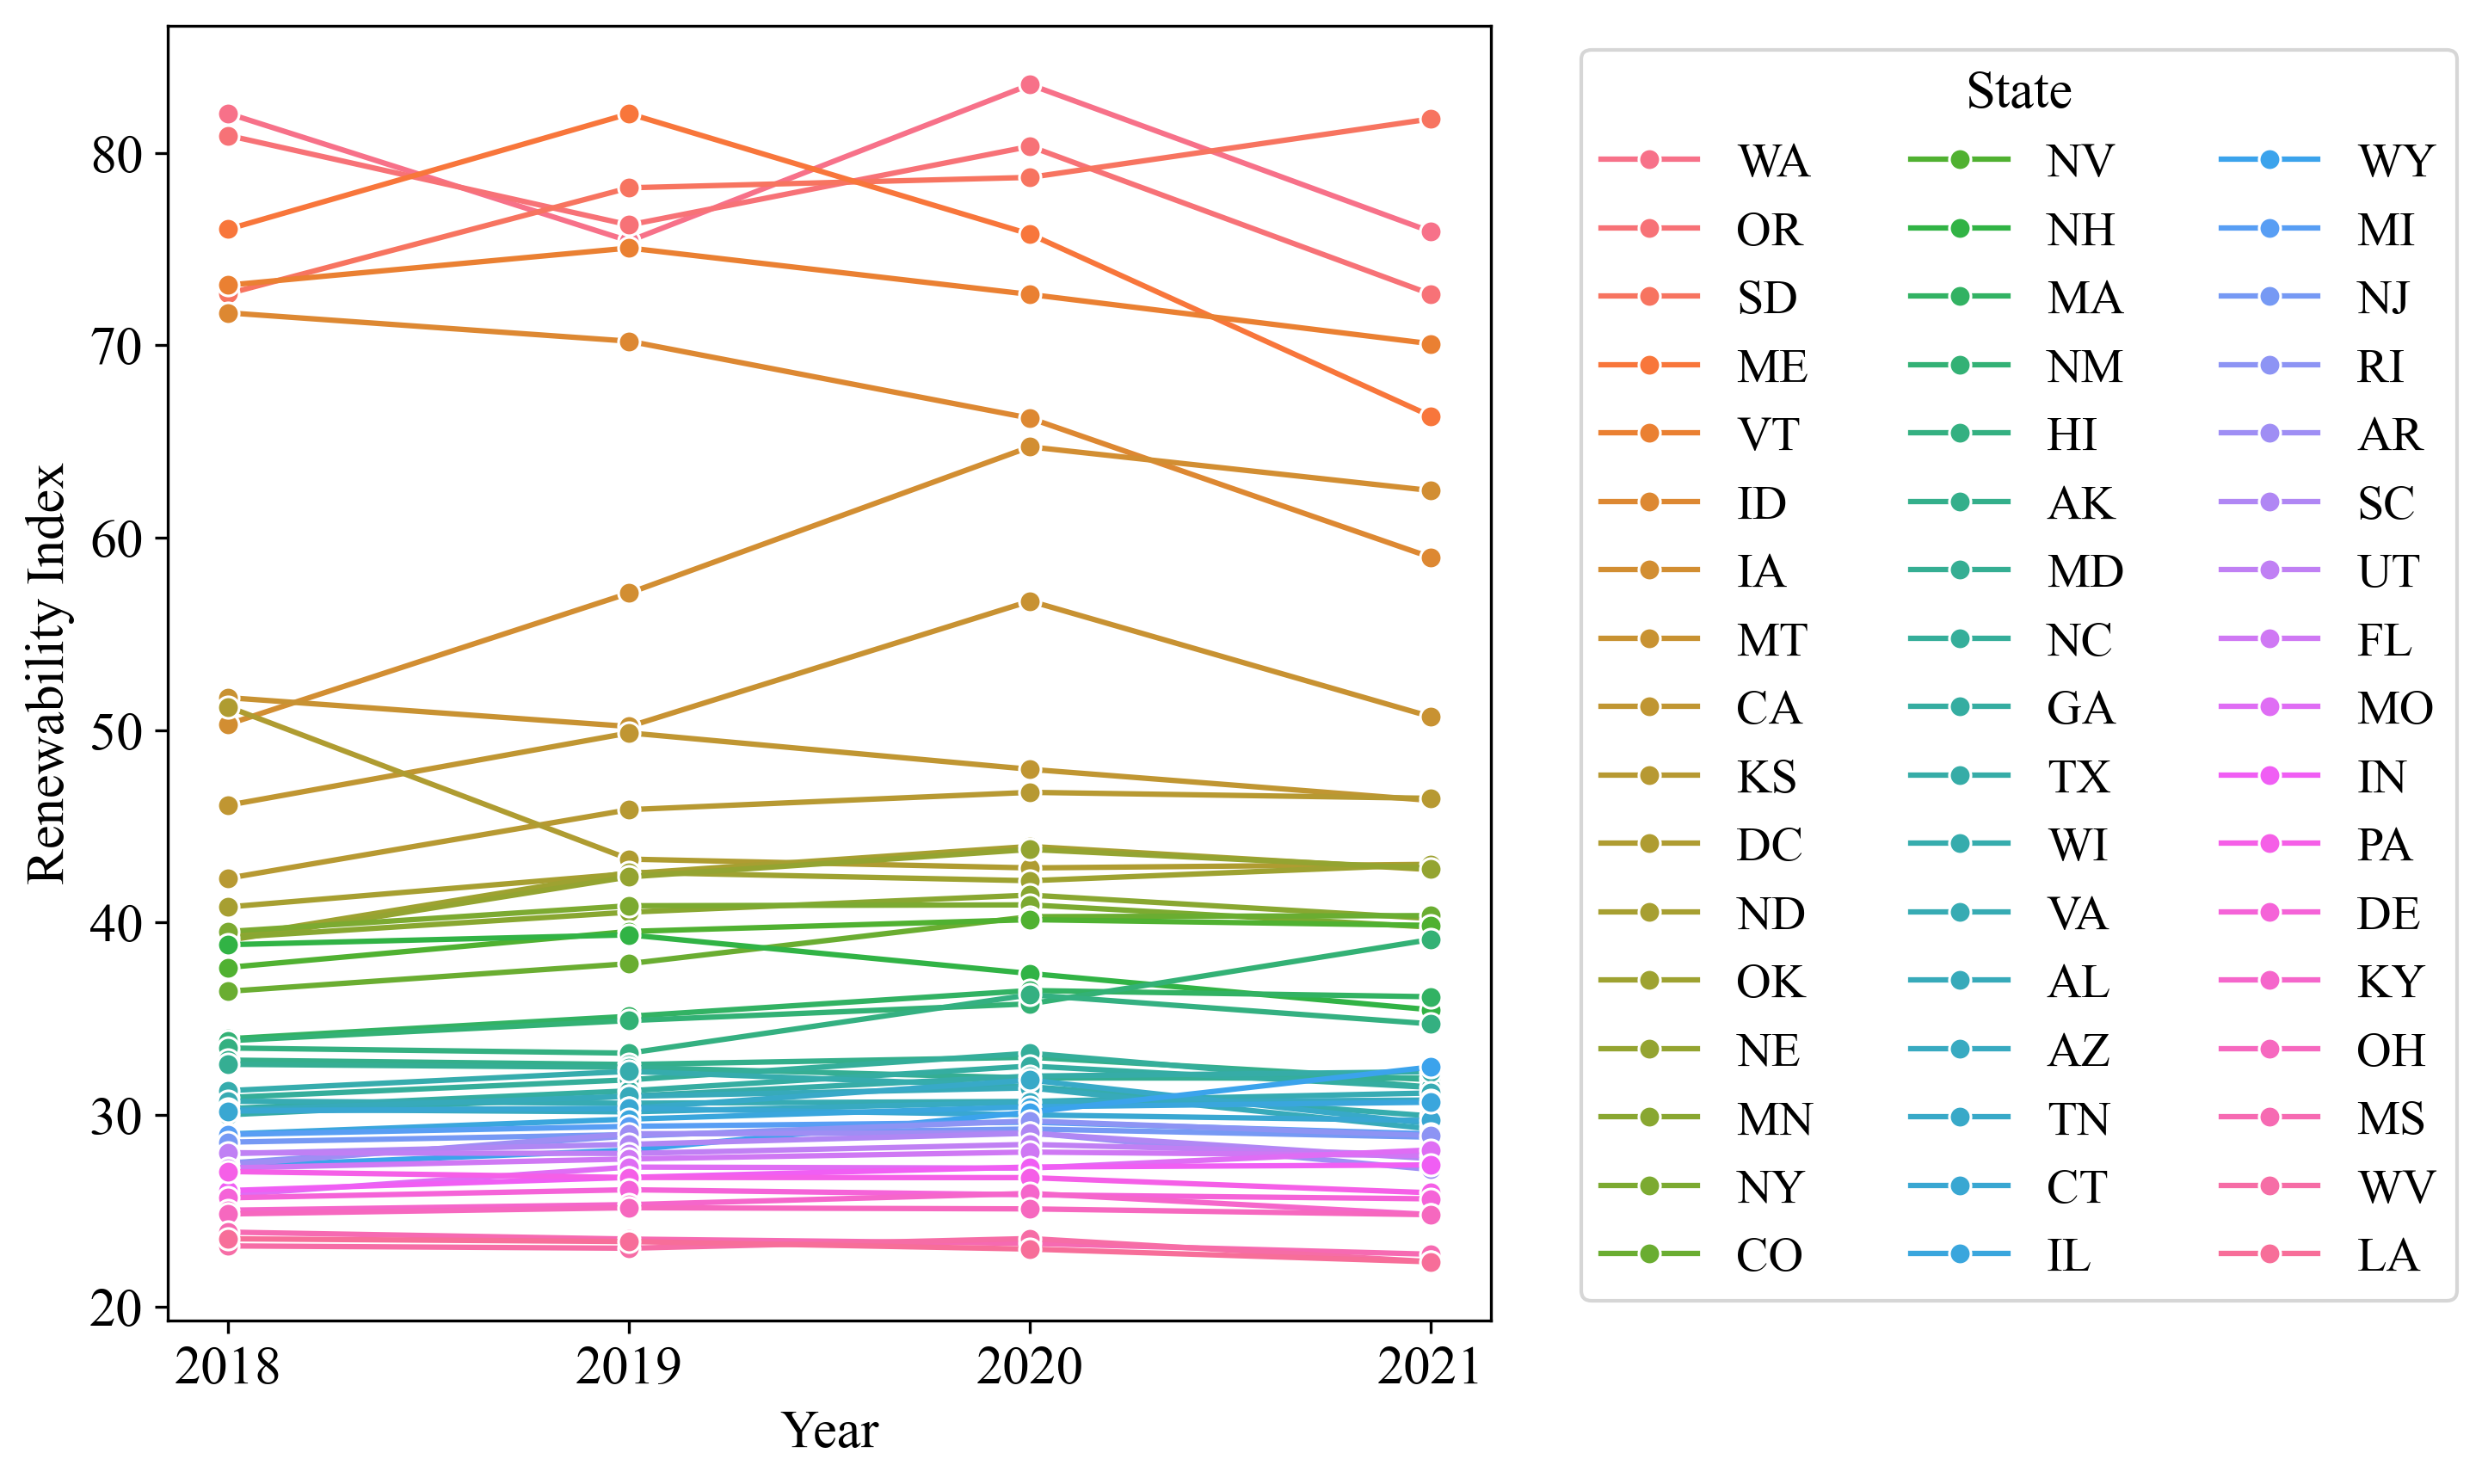

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to Times New Roman and the size to 15
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15

# Calculate the mean ranking for each state
ranking_cols = ["Rank_2018", "Rank_2019", "Rank_2020", "Rank_2021"]
data["Mean Rank"] = data[ranking_cols].mean(axis=1)

# Sort the dataframe by 'Mean Rank' and then alphabetically by 'State' for states with the same mean rank
sorted_data = data.sort_values(by=["Mean Rank", "State"])

# Extracting the sorted list of states for use in the legend ordering
sorted_states = sorted_data["State"].tolist()

# Plotting with the legend ordered by mean ranking
plt.figure(figsize=(10, 6), dpi=300)
lineplot = sns.lineplot(data=melted_data, x="Year", y="Renewability Index", hue="State", marker="o",
                        hue_order=sorted_states)
plt.ylabel("Renewability Index")
plt.xlabel("Year")
plt.xticks(melted_data["Year"].unique())

# Adjusting legend to reflect the mean ranking order and placing it outside the plot
handles, labels = lineplot.get_legend_handles_labels()
sorted_legend = dict(zip(labels, handles))
ordered_legend = [sorted_legend[state] for state in sorted_states if state in sorted_legend]

# Set the legend to appear in 3 columns
plt.legend(ordered_legend, sorted_states, title="State", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3, fontsize=13.5)

plt.tight_layout()
plt.show()